<a href="https://colab.research.google.com/github/Syedzamin07/fraud-detection-banking-pipeline/blob/main/fraud_detection_banking_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Objective:
Automating fraud detection for large-scale banking transactions
to reduce manual review overhead by 40% and improve risk response time.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the credit card fraud dataset
# This URL provides a direct link to the standard creditcard.csv dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# Print the first 5 rows to ensure data is loaded
print("Dataset Head:")
display(df.head())

# Critical: Show the Class Imbalance
print("\nClass Distribution (0: No Fraud, 1: Fraud):")
print(df['Class'].value_counts())

# Calculate the fraud ratio
fraud_ratio = (df['Class'].value_counts()[1] / len(df)) * 100
print(f"\nFraud Ratio: {fraud_ratio:.4f}%")

Dataset Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Class Distribution (0: No Fraud, 1: Fraud):
Class
0    284315
1       492
Name: count, dtype: int64

Fraud Ratio: 0.1727%


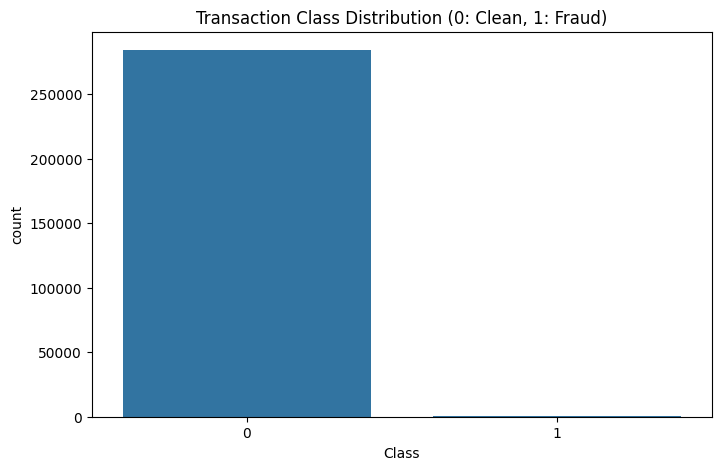

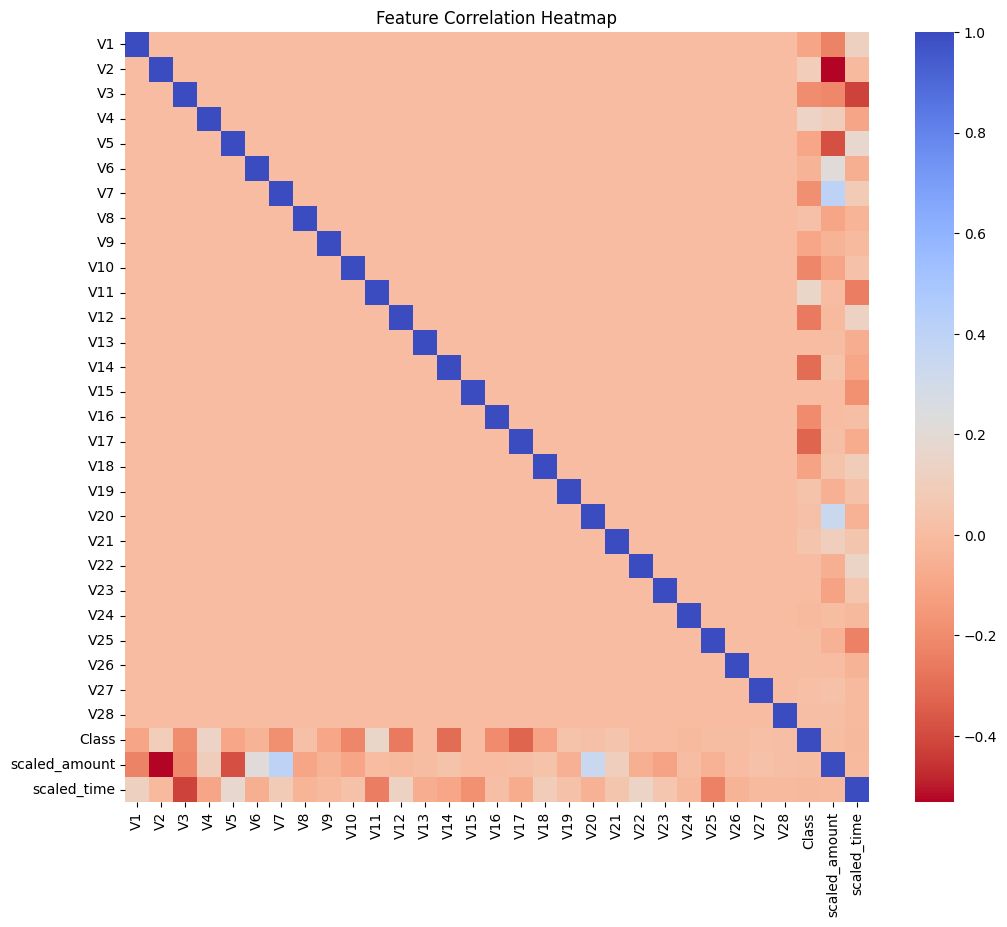


Top 3 features most strongly correlated with Fraud (Class):
V11    0.154876
V4     0.133447
V2     0.091289
Name: Class, dtype: float64
V17   -0.326481
V14   -0.302544
V12   -0.260593
Name: Class, dtype: float64


In [2]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Visualize Imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df)
plt.title('Transaction Class Distribution (0: Clean, 1: Fraud)')
plt.show()

# 2. Feature Scaling
# Scaling Time and Amount to match the V1-V28 PCA features
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Drop original unscaled columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# 3. Correlation Analysis (Heatmap)
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Feature Correlation Heatmap')
plt.show()

# Identify top correlations with 'Class'
print("\nTop 3 features most strongly correlated with Fraud (Class):")
print(corr['Class'].sort_values(ascending=False).iloc[1:4]) # Positive correlation
print(corr['Class'].sort_values(ascending=True).iloc[:3])    # Negative correlation